# Project 2

#### Description: 
*For Project 2, I am exploring the relationship between the languages spoken in Indian states and the literacy rates therein. I downloaded the two datasets, that is, one detailing the languages and the other the literacy rates. The data is based on the most recent census in India (conducted in 2011.)* 

*After cleaning and standardizing the datasets, I merged the two for ease of analysis on the 'State' variable. Using bar plots, I visualized potential patterns. My aim was to study whether the prevalence of certain languages in a State were related to its literacy rate.*

#### Details of the dataset:

**Languages in Indian States:** Translators without Borders (2020). *Language and literacy data from the Office of the Registrar General & Census Commissioner, India (2011 Census).* Accessed on November 22, 2024. Available here: https://data.humdata.org/dataset/61a9df6a-c1fa-4885-9c3f-e00666ec859c/resource/a6a31c2f-20a9-4f25-81f6-12ae60000bcd/download/in_lang_admin1_v01.csv.

**Literacy in India:** Satyam Prasad Tiwari (2020). *India Literacy Data - District Wise.* Accessed November 22, 2024. Available here: Downloads/archive.zip\
https://www.kaggle.com/api/v1/datasets/download/satyampd/india-literacy-data-district-wise

#### Assistance:
*I ran my codes through chatGPT and amended them accordingly.*

### Importing the Packages

I imported pandas for working and wrangling the dataset and matplotlib and seaborn for data visualization purposes.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset 1: Languages in India

The first thing I did was check for the column names and decide which ones I wanted to keep. I kept the State (since it was the common variable with the other dataset), the official language of the state and the state population. I further cleaned the dataset by dropping line 0 (since it was just codes, and hence not relevant.)

To ensure uniformity across the two datasets, I formatted the way state names were presented under the column 'State.' I changed it into lower case, and changed the name of certain state names (like, NCT DELHI to delhi or ODISHA to orissa) and replaced '&' with 'and' (like, ANDAMAN & NICOBAR ISLANDS to andaman and nicobar islands.)

In [96]:
language_df = pd.read_csv("C:/Users/joosa/Downloads/in_lang_admin1_v01.csv")

columns_keep = ["admin1_name", "main_language", "pop_total"]

language_df = language_df[columns_keep]

new_columns = {"admin1_name": "State", "main_language": "State Language", "pop_total": "State Population"}

language_df.rename(columns = new_columns, inplace = True)

language_df = language_df.drop(index=0)

language_df["State"] = language_df["State"].str.strip().str.lower()

language_df["State"] = language_df["State"].replace({
    "nct of delhi": "delhi",
    "odisha": "orissa",
})

language_df["State"] = language_df["State"].str.replace("&", "and", regex=False)

print(language_df)

                          State State Language State Population
1   andaman and nicobar islands        Bengali           380581
2                andhra pradesh         Telugu         84580777
3             arunachal pradesh          Nissi          1383727
4                         assam       Assamese         31205576
5                         bihar          Hindi        104099452
6                    chandigarh          Hindi          1055450
7                  chhattisgarh          Hindi         25545198
8        dadra and nagar haveli          Bhili           343709
9                 daman and diu       Gujarati           243247
10                          goa        Konkani          1458545
11                      gujarat       Gujarati         60439692
12                      haryana          Hindi         25351462
13             himachal pradesh          Hindi          6864602
14            jammu and kashmir       Kashmiri         12541302
15                    jharkhand         

### Dataset 2: Literacy Rate in India

In this dataset, I did not have to make many changes, only writing the code to ensure that all were in lower case. I kept the 'State' and 'Literacy'columns for ease of reference. The only issue I faced was that since districts were also inlcuded in the original dataset, many state names were repeated. I combined those state names using grouby. For this, I did refer to ChatGPT and google to ensure that I was writing the right code.

In [108]:
literacy_df = pd.read_csv("C:/Users/joosa/OneDrive/Desktop/Literacy_Data_2011.csv")

columns_to_keep = ["State", "Literacy"]

literacy_df = literacy_df[columns_to_keep]

literacy_df = literacy_df.groupby('State', as_index=False).mean()

literacy_df["State"] = literacy_df["State"].str.strip().str.lower()

print(literacy_df)

                          State   Literacy
0   andaman and nicobar islands  83.700000
1                andhra pradesh  66.293913
2             arunachal pradesh  63.861875
3                         assam  72.247407
4                         bihar  61.756316
5                    chandigarh  86.050000
6                  chhattisgarh  65.841667
7        dadra and nagar haveli  76.240000
8                 daman and diu  85.765000
9                         delhi  86.556667
10                          goa  88.580000
11                      gujarat  76.389231
12                      haryana  75.358571
13             himachal pradesh  81.747500
14            jammu and kashmir  65.377273
15                    jharkhand  64.744583
16                    karnataka  73.655667
17                       kerala  93.695000
18                  lakshadweep  91.850000
19               madhya pradesh  67.683400
20                  maharashtra  80.967143
21                      manipur  76.360000
22         

### Merged Datasets

I merged the datasets on 'State.'

In [109]:
literacy_and_language_df = pd.merge(language_df, literacy_df, on='State', how='inner')

print(literacy_and_language_df)

                          State State Language State Population   Literacy
0   andaman and nicobar islands        Bengali           380581  83.700000
1                andhra pradesh         Telugu         84580777  66.293913
2             arunachal pradesh          Nissi          1383727  63.861875
3                         assam       Assamese         31205576  72.247407
4                         bihar          Hindi        104099452  61.756316
5                    chandigarh          Hindi          1055450  86.050000
6                  chhattisgarh          Hindi         25545198  65.841667
7        dadra and nagar haveli          Bhili           343709  76.240000
8                 daman and diu       Gujarati           243247  85.765000
9                           goa        Konkani          1458545  88.580000
10                      gujarat       Gujarati         60439692  76.389231
11                      haryana          Hindi         25351462  75.358571
12             himachal p

### Data Visualization

For data visualization, I started with Plot 1, that is, checking literacy across Indian states by the language spoken by them. With Plot 2, I wanted to confirm if language did have any correlation with literacy, and if there were any changes in comparison to Plot 1.

### Plot 1: Literacy Across Indian States by State Language

I adjusted my codes as per ChatGPt, to help me with the code for inserting the names of the languages within the bar plots (instead of a traditional legend on the side) for ease of reference.

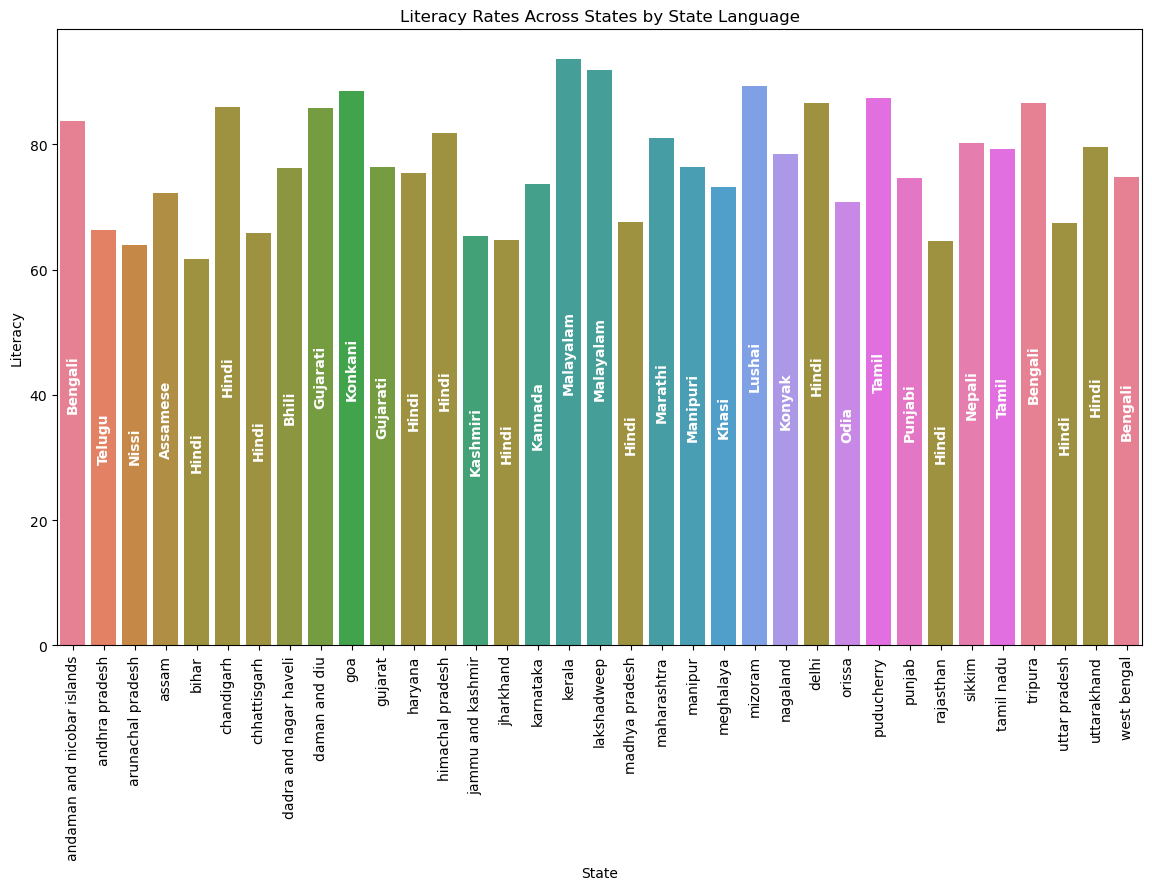

In [107]:
import numpy as np

plt.figure(figsize=(14, 8))

ax = sns.barplot(x = "State", y = "Literacy", data = literacy_and_language_df, hue = "State Language")

ax.legend().set_visible(False)

plt.xticks(rotation=90)
plt.title("Literacy Rates Across States by State Language")

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    mask = np.isclose(literacy_and_language_df["Literacy"], y)
    if mask.any():
        language = literacy_and_language_df.loc[mask, "State Language"].values[0]
        ax.text(x, y / 2, language, ha = "center", va = "center", rotation = 90, color = "white", fontweight = "bold")

plt.show()

### Plot 2: Average Literacy Rates by State Language

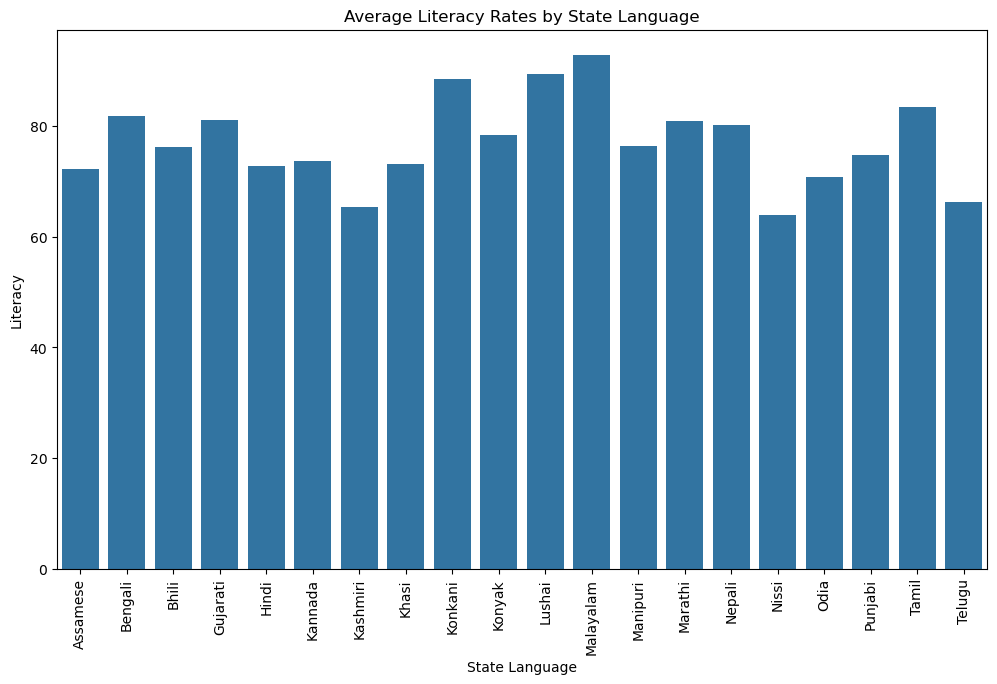

In [104]:
language_literacy_df = literacy_and_language_df.groupby("State Language")["Literacy"].mean().reset_index()

plt.figure(figsize=(12, 7))

sns.barplot(x="State Language", y="Literacy", data=language_literacy_df)

plt.xticks(rotation=90)

plt.title("Average Literacy Rates by State Language")

plt.show()

### Takeaways

- It was interesting to learn that language does have some correlation with the literacy rate in a State.

- Other confounding variables notwithstanding, Indian states in which Malyalam was spoken (that is, in Kerala and Lakshadweep) had a higher literacy rate than other states where a different language was spoken.

- Hindi is spoken in multiple states, however, not all these States had a uniform literacy rate. This shows that linguistic diversity is not the only determinant of literacy, and that other factors like population, socio-economic status of the peoples, parental/family beliefs etc. also have an impact on literacy rates.